In [70]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [71]:
%matplotlib inline

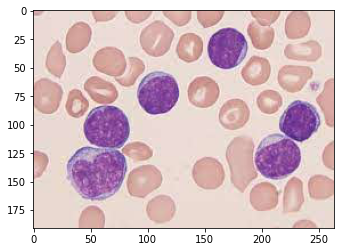

In [72]:
cvimg = cv2.imread('dataset/train/img-1.jpg')
rgbimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)

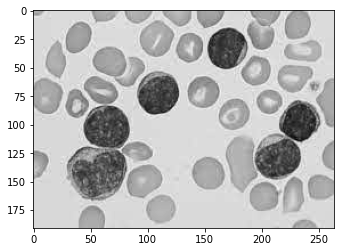

In [73]:
gsimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2GRAY)
plt.imshow(gsimg, 'gray')

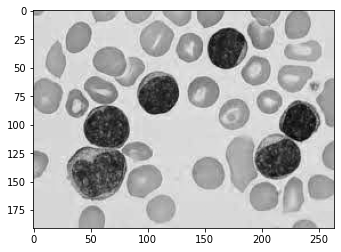

In [74]:
greenimg = cvimg[:,:,1].astype('float64')
greenimg *= (255.0/greenimg.max())
greenimg = greenimg.astype('uint8')
plt.imshow(greenimg, 'gray')

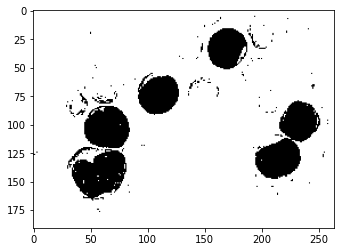

In [75]:
adabingreenimg = cv2.adaptiveThreshold(greenimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 62)
plt.imshow(adabingreenimg, 'gray')

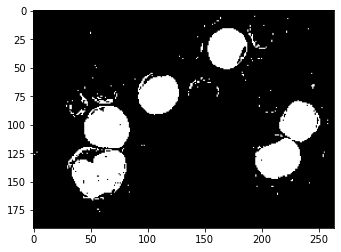

In [76]:
invadabingreenimg = 255-adabingreenimg
plt.imshow(invadabingreenimg, 'gray')

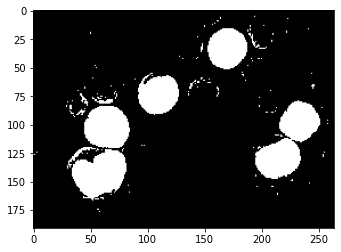

In [77]:
img, contours, hierarchy = cv2.findContours(invadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    cv2.fillPoly(invadabingreenimg, pts=[contour], color=255)
plt.imshow(invadabingreenimg, 'gray')

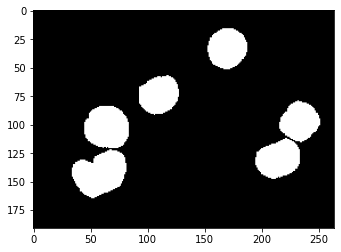

In [78]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
oinvadabingreenimg = cv2.morphologyEx(invadabingreenimg,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(oinvadabingreenimg, 'gray')

In [79]:
_, whitecellscontours, _ = cv2.findContours(oinvadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(whitecellscontours))

6


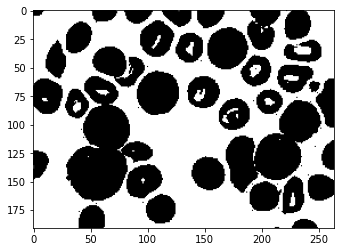

In [80]:
adabingreenimg = cv2.adaptiveThreshold(greenimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 0)
plt.imshow(adabingreenimg, 'gray')

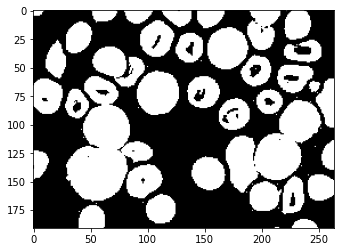

In [81]:
invadabingreenimg = 255 - adabingreenimg
plt.imshow(invadabingreenimg, 'gray')

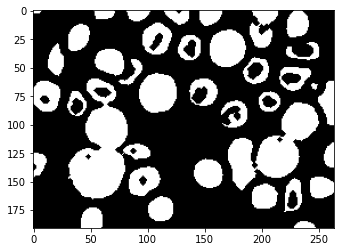

In [82]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
erodedinvadabingreenimg = cv2.morphologyEx(invadabingreenimg,cv2.MORPH_ERODE,kernel, iterations = 2)
plt.imshow(erodedinvadabingreenimg, 'gray')

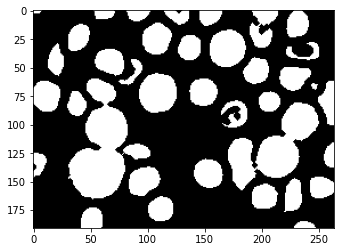

In [83]:
img, contours, hierarchy = cv2.findContours(erodedinvadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    cv2.fillPoly(erodedinvadabingreenimg, pts =[contour], color=255)
plt.imshow(erodedinvadabingreenimg, 'gray')

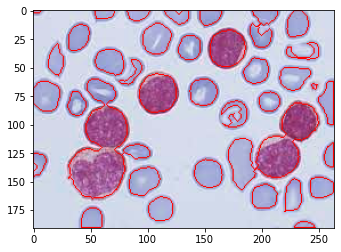

In [84]:
img, contours, hierarchy = cv2.findContours(erodedinvadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = cvimg.copy()
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
plt.imshow(img, 'gray')

In [85]:
_, redcellscontours, _ = cv2.findContours(erodedinvadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(redcellscontours))
contour = redcellscontours

37


In [86]:
redcellcount = 0
for contour in contours:
    cimg = np.zeros(shape=erodedinvadabingreenimg.shape, dtype=np.uint8)
    cv2.fillPoly(cimg, pts=[contour], color=255)
    whites = 0
    for wcontour in whitecellscontours:
        wimg = np.zeros(shape=erodedinvadabingreenimg.shape, dtype=np.uint8)
        cv2.fillPoly(wimg, pts=[wcontour], color=255)
        if cv2.countNonZero(cv2.bitwise_and(cimg, wimg)) != 0:
            whites = whites + 1
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
            wimg = cv2.morphologyEx(wimg, cv2.MORPH_DILATE, kernel, iterations=2)
            cimg = cv2.subtract(cimg, wimg)
    if whites == 0:
        redcellcount = redcellcount + 1
    else:
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
        cimg = cv2.morphologyEx(cimg, cv2.MORPH_OPEN, kernel, iterations=3)
        _, cimgcontours, _ = cv2.findContours(cimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        redcellcount = redcellcount + len(cimgcontours)
print(redcellcount)

35
